In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
data = pd.read_csv('rideshare_kaggle.csv')

In [4]:
data.head()
# copy = data.copy()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [5]:
# Handle unwanted data:
print(data.isnull().sum())
data = data.dropna()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [6]:
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [7]:
ex_cols = ['id','timestamp','apparentTemperature','apparentTemperatureMaxTime','apparentTemperatureMax','apparentTemperatureMinTime',
           'apparentTemperatureMin','temperatureMaxTime','temperatureMinTime','apparentTemperatureHigh',
           'apparentTemperatureLowTime','apparentTemperatureHighTime','apparentTemperatureHigh','temperatureLowTime',
           'temperatureHighTime','precipIntensity','humidity','windGust','windSpeed','dewPoint','precipIntensityMax','cloudCover',
           'moonPhase','windGustTime','visibility','uvIndex','windBearing','visibility.1','ozone','sunriseTime',
           'sunsetTime','uvIndexTime']

In [8]:
len(ex_cols)

32

In [9]:
data=data.drop(ex_cols,axis=1)

In [10]:
data.head()

,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,short_summary,long_summary,precipProbability,temperatureHigh,temperatureLow,apparentTemperatureLow,icon,pressure,temperatureMin,temperatureMax
0,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,Mostly Cloudy,Rain throughout the day.,0.0,43.68,34.19,27.39,partly-cloudy-night,1021.98,39.89,43.68
1,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,Rain,"Rain until morning, starting again in the eve...",1.0,47.30,42.10,36.20,rain,1003.97,40.49,47.30
2,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,Clear,Light rain in the morning.,0.0,47.55,33.10,29.11,clear-night,992.28,35.36,47.55
3,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,Clear,Partly cloudy throughout the day.,0.0,45.03,28.90,26.20,clear-night,1013.73,34.67,45.03
4,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,Partly Cloudy,Mostly cloudy throughout the day.,0.0,42.18,36.71,30.29,partly-cloudy-night,998.36,33.10,42.18


In [11]:
data['datetime'] = pd.to_datetime(data['datetime'], format = "%Y/%m/%d %H:%M:%S")

In [12]:
data.head()

,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,short_summary,long_summary,precipProbability,temperatureHigh,temperatureLow,apparentTemperatureLow,icon,pressure,temperatureMin,temperatureMax
0,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,Mostly Cloudy,Rain throughout the day.,0.0,43.68,34.19,27.39,partly-cloudy-night,1021.98,39.89,43.68
1,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,Rain,"Rain until morning, starting again in the eve...",1.0,47.30,42.10,36.20,rain,1003.97,40.49,47.30
2,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,Clear,Light rain in the morning.,0.0,47.55,33.10,29.11,clear-night,992.28,35.36,47.55
3,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,Clear,Partly cloudy throughout the day.,0.0,45.03,28.90,26.20,clear-night,1013.73,34.67,45.03
4,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,Partly Cloudy,Mostly cloudy throughout the day.,0.0,42.18,36.71,30.29,partly-cloudy-night,998.36,33.10,42.18


In [13]:
day_week = [calendar.day_name[x.dayofweek] for x in data['datetime']]
day_week = pd.Series(day_week)

In [14]:
data.head()

,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,short_summary,long_summary,precipProbability,temperatureHigh,temperatureLow,apparentTemperatureLow,icon,pressure,temperatureMin,temperatureMax
0,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,Mostly Cloudy,Rain throughout the day.,0.0,43.68,34.19,27.39,partly-cloudy-night,1021.98,39.89,43.68
1,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,Rain,"Rain until morning, starting again in the eve...",1.0,47.30,42.10,36.20,rain,1003.97,40.49,47.30
2,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,Clear,Light rain in the morning.,0.0,47.55,33.10,29.11,clear-night,992.28,35.36,47.55
3,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,Clear,Partly cloudy throughout the day.,0.0,45.03,28.90,26.20,clear-night,1013.73,34.67,45.03
4,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,Partly Cloudy,Mostly cloudy throughout the day.,0.0,42.18,36.71,30.29,partly-cloudy-night,998.36,33.10,42.18


Text(0.5, 1.0, 'Number of trip VS days')

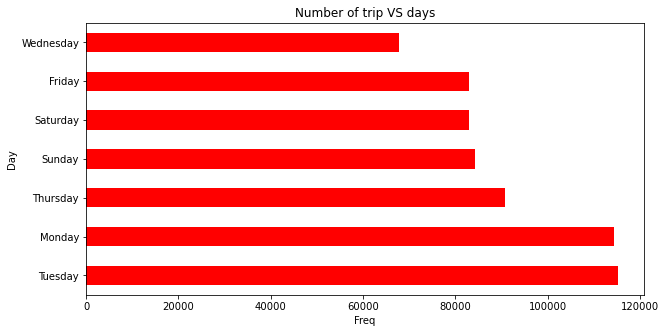

In [15]:
days=day_week.value_counts()
days.plot(kind = 'barh', color = 'red', figsize = (10,5))
plt.xlabel('Freq')
plt.ylabel('Day')
plt.title('Number of trip VS days')

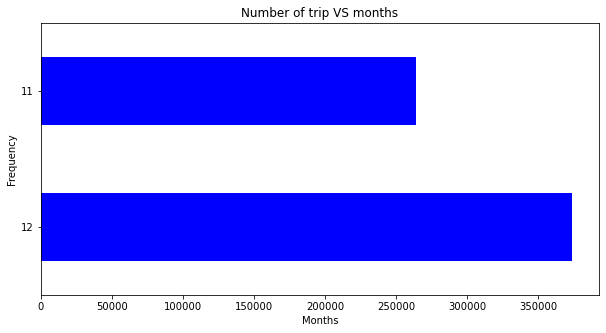

In [16]:
months = data['month'].value_counts()
months.plot(kind = 'barh', color = 'blue', figsize = (10,5))
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.title('Number of trip VS months')
plt.show()

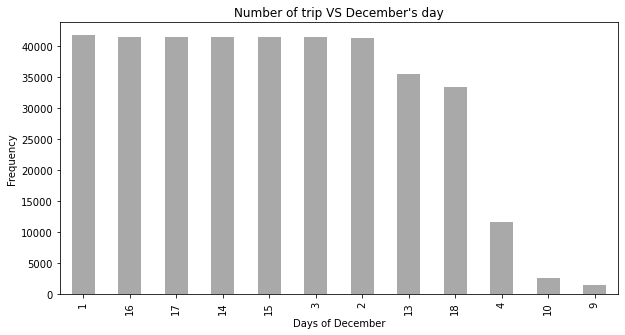

In [17]:
months = data['day'][data['month']==12].value_counts()
months.plot(kind = 'bar', color = 'darkgrey', figsize = (10,5))
plt.xlabel('Days of December')
plt.ylabel('Frequency')
plt.title("Number of trip VS December's day")
plt.show()

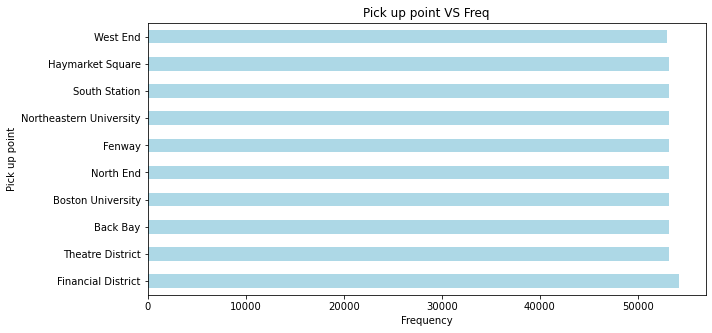

In [18]:
months = data['source'].value_counts().nlargest(10)
months.plot(kind = 'barh', color = 'lightblue', figsize = (10,5))
plt.xlabel('Frequency')
plt.ylabel('Pick up point')
plt.title("Pick up point VS Freq")
plt.show()

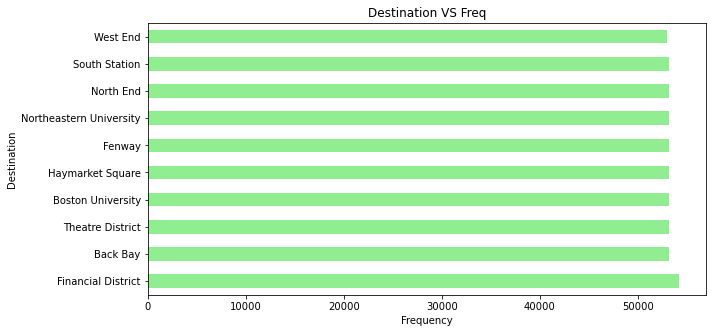

In [19]:
months = data['destination'].value_counts().nlargest(10)
months.plot(kind = 'barh', color = 'lightgreen', figsize = (10,5))
plt.xlabel('Frequency')
plt.ylabel('Destination')
plt.title("Destination VS Freq")
plt.show()

In [20]:
# pick-dest frequency
p_d = data.groupby(by=["destination","source"])
p_d.head()

,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,short_summary,long_summary,precipProbability,temperatureHigh,temperatureLow,apparentTemperatureLow,icon,pressure,temperatureMin,temperatureMax
0,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.00,42.2148,-71.0330,42.34,Mostly Cloudy,Rain throughout the day.,0.00,43.68,34.19,27.39,partly-cloudy-night,1021.98,39.89,43.68
1,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.00,42.2148,-71.0330,43.58,Rain,"Rain until morning, starting again in the eve...",1.00,47.30,42.10,36.20,rain,1003.97,40.49,47.30
2,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.00,42.2148,-71.0330,38.33,Clear,Light rain in the morning.,0.00,47.55,33.10,29.11,clear-night,992.28,35.36,47.55
3,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.00,42.2148,-71.0330,34.38,Clear,Partly cloudy throughout the day.,0.00,45.03,28.90,26.20,clear-night,1013.73,34.67,45.03
4,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.00,42.2148,-71.0330,37.44,Partly Cloudy,Mostly cloudy throughout the day.,0.00,42.18,36.71,30.29,partly-cloudy-night,998.36,33.10,42.18
6,5,26,11,2018-11-26 05:03:00,America/New_York,Back Bay,Northeastern University,Lyft,lyft_plus,Lyft XL,10.5,1.08,1.00,42.3503,-71.0810,41.99,Overcast,"Rain until morning, starting again in the eve...",0.00,46.46,42.17,37.08,cloudy,1014.11,40.67,46.46
7,19,2,12,2018-12-02 19:53:04,America/New_York,Back Bay,Northeastern University,Lyft,lyft_lux,Lux Black,16.5,1.08,1.00,42.3503,-71.0810,49.88,Light Rain,Light rain until evening.,1.00,50.80,44.97,45.62,rain,1004.33,36.32,50.80
8,6,3,12,2018-12-03 06:28:02,America/New_York,Back Bay,Northeastern University,Lyft,lyft_line,Shared,3.0,1.08,1.00,42.3503,-71.0810,45.58,Foggy,Foggy in the morning.,0.00,57.02,33.74,28.53,fog,1001.06,43.09,57.02
9,10,27,11,2018-11-27 10:45:22,America/New_York,Back Bay,Northeastern University,Lyft,lyft_luxsuv,Lux Black XL,27.5,1.08,1.00,42.3503,-71.0810,45.45,Light Rain,Light rain in the morning.,1.00,46.91,33.82,30.19,rain,989.98,36.34,46.91
10,16,30,11,2018-11-30 16:13:03,America/New_York,Back Bay,Northeastern University,Lyft,lyft_premier,Lux,13.5,1.08,1.00,42.3503,-71.0810,40.13,Clear,Mostly cloudy throughout the day.,0.00,42.32,31.57,28.10,clear-day,1016.84,28.64,42.32


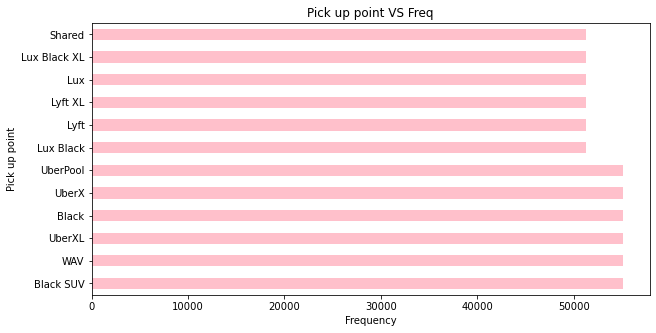

In [21]:
months = data['name'].value_counts()
months.plot(kind = 'barh', color = 'pink', figsize = (10,5))
plt.xlabel('Frequency')
plt.ylabel('Pick up point')
plt.title("Pick up point VS Freq")
plt.show()

In [ ]:
# Predictive Analysis for Uber Price Prediction using ML

In [22]:
# Bring all the categorical data to the numeric format using label encoding:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [23]:
data['id'] = label_encoder.fit_transform(data['id'])
data['datetime'] = label_encoder.fit_transform(data['datetime'])
data['timezone'] = label_encoder.fit_transform(data['timezone'])
data['destination'] = label_encoder.fit_transform(data['destination'])
data['product_id'] = label_encoder.fit_transform(data['product_id'])
data['short_summary'] = label_encoder.fit_transform(data['short_summary'])
data['long_summary'] = label_encoder.fit_transform(data['long_summary'])
data['name'] = label_encoder.fit_transform(data['name'])

KeyError: 'id'

In [ ]:
print("Class mapping of Name: \n")
for i,item in enumerate(label_encoder.classes_):
    print(item,"==>",i)


In [ ]:
# Label for pick up point:
data['source'] = label_encoder.fit_transform(data['source'])
print("Class mapping of Source: \n")
for i,item in enumerate(label_encoder.classes_):
    print(item,"==>",i)


In [ ]:
# Label for current weather:
data['icon'] = label_encoder.fit_transform(data['icon'])
print("Class mapping of Weather: \n")
for i,item in enumerate(label_encoder.classes_):
    print(item,"==>",i)

In [ ]:
# Label for cab type:
data['cab_type'] = label_encoder.fit_transform(data['cab_type'])
print("Class mapping of Cab type: \n")
for i,item in enumerate(label_encoder.classes_):
    print(item,"==>",i)

In [ ]:
# Since we are only predicting the prices for Uber, our dataset will contain ~ 400000 records
len(data[data['cab_type']==1])

In [ ]:
# Train-test split with the price col as target:
X = data[data['cab_type']==1].drop(['price','cab_type'], axis=1)
y = data[data['cab_type']==1]['price']

X.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# look at what the typical prices are for the rides
plt.hist(y,bins=20,color='orange')
plt.show()

In [ ]:
# Train and compare the performance of four ML models: linear regression, decision tree, random forest, and gradient boosting.

In [ ]:
# Feature selection technique like RFE would be helpful for optimal analysis

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble

In [ ]:
# Define function to train and test all 4 models:
def train_test_models(X_train, y_train, X_test, y_test):
    print("Linear Regression:")
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    print(lr.score(X_test, y_test))
    
    print("Decision Tree:")
    dt=DecisionTreeRegressor(random_state=0, max_depth=10)
    dt.fit(X_train,y_train)
    print(dt.score(X_test, y_test))
    
    print("RandomForestRegressor:")
    rf=RandomForestRegressor(n_estimators=20,random_state=0)
    rf.fit(X_train,y_train)
    print(rf.score(X_test, y_test))
    
    print("Gradient Boosting:")
    gb=ensemble.GradientBoostingRegressor(n_estimators=200,max_depth=5)
    gb.fit(X_train,y_train)
    print(gb.score(X_test, y_test))
    
    return [lr,dt,rf,gb]

In [ ]:
def features_eliminate(trained_model, X, y, n_features=40):
    rfe=RFE(trained_model, n_features_to_select=n_features)
    rfe.fit(X,y)
    X_new=X[X.columns[rfe.support_]]
    X_train, X_test, y_train, y_test = train_test_split(X_new,y,
                                                        test_size=0.2,
                                                        random_state=0)
    new_fit=trained_model.fit(X_train,y_train)
    print(new_fit.score(X_test,y_test))

In [ ]:
model = train_test_models(X_train, y_train, X_test, y_test)

# Linear regression, decision tree, random forest, and GBM perform better with 5 or 10 features instead of 25

In [ ]:
# Uber-Lyft Price Prediction project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
df=pd.read_csv("rideshare_kaggle.csv")
# df.head()

In [ ]:
df.info()

In [3]:
df['datetime']=pd.to_datetime(df['datetime'])

In [ ]:
df.head()

In [4]:
# Data Cleaning
df.isnull().sum().sum()

55095

In [5]:
df.dropna(axis=0,inplace=True)

In [6]:
df.isnull().sum().sum()
# df['visibility'].head()

0

In [7]:
df['visibility'].head()

0    10.000
1     4.786
2    10.000
3    10.000
4    10.000
Name: visibility, dtype: float64

In [8]:
df = df.drop(['visibility.1'],axis=1)

In [9]:
df.shape

(637976, 56)

In [ ]:
# EDA and Visualization

In [ ]:
# 1. Time Analysis
# Month Data
def plot_bar(groupby_column):
    df1 =df.groupby(groupby_column).size().reset_index(name="counts")
    fig1 = px.bar(data_frame=df1, x=groupby_column, y="counts", color=groupby_column, barmode="group")
    print(df1)
    fig1.show(renderer='png')

In [ ]:
plot_bar('month')

In [ ]:
# Day
plot_bar('day')

In [ ]:
# Hour
plot_bar('hour')

In [ ]:
# 2. Source and Destination Analysis
plot_bar('source')

In [ ]:
plot_bar('destination')

In [ ]:
df.groupby(by=["destination","source"]).agg({'latitude':'mean','longitude':'mean'})

In [ ]:
# 3. Cab type Analysis
plot_bar('cab_type')

In [ ]:
df2 =df.groupby(by=["day","cab_type"]).size().reset_index(name="counts")
fig2 = px.bar(data_frame=df2, x="day", y="counts", color="cab_type", barmode="group")
fig2.show(renderer='png')

In [ ]:
df3 =df.groupby(["hour","cab_type"]).size().reset_index(name="counts")
fig3 = px.bar(data_frame=df3, x="hour", y="counts", color="cab_type", barmode="group")
fig3.show(renderer='png')

In [ ]:
# So in every day and every hour recorded, uber seems dominating booking order in our data

In [ ]:
# 4. Price Analysis
pd.set_option('display.max_rows', 72)
df.groupby(by=["source","destination"]).price.agg(["mean"])

In [ ]:
# Max price
print('Maximum price in our data :',df.price.max())
df[df['price']==df.price.max()]

In [ ]:
df[df['price']==df.price.max()][['latitude','longitude']]

In [ ]:
# import geopandas as gpd
# import folium
# #Using this code to plot the map of both places using folium to see how far they are from each other
# map1 = folium.Map(location=(42.3503,-71.081),zoom_start = 10)
# folium.Marker(location=(42.3503,-71.081)).add_to(map1) # Fenway
# folium.Marker(location=(42.3378,-71.066)).add_to(map1) # Financial District
# display(map1)

In [ ]:
df_group = df.groupby(by=["source","destination"]).price.agg(["mean"]).reset_index()
df_group[(df_group['source']=='Financial District')& (df_group['destination']=='Fenway')]

In [ ]:
# The mean of the price data of that route is 23.4 dollars, 
# which is far from our maximum price data (97.5 dollars). 
# Then it is possible an outlier. We can drop it.

In [ ]:
df = df.loc[df['price']!=df.price.max()]

In [ ]:
df.head()

In [ ]:
# Data Processing & Feature Engineering

In [10]:
# 1. Removing Unnecessary Features
df = df.drop(['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime'],axis=1)

In [11]:
df.shape

(637976, 41)

In [ ]:
# Our goal is to make linear regression model. First we check correlation between our features and target feature (price)
# I want to check the correlation of our temperature related features with our target feature (Price)
temp_cols= ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
            'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin',
            'apparentTemperatureMax','price']

In [ ]:
df_temp = new_df[temp_cols]
df_temp.head()

In [ ]:
plt.figure(figsize=(15,20))
sns.heatmap(df_temp.corr(),annot=True)

In [12]:
# We see that all temperature related features have weak correlation with our target feature which is price 
# => remove them will not impact to our regression model
df = df.drop(['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
              'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin',
              'apparentTemperatureMax'],axis=1)
df.shape

(637976, 30)

In [ ]:
#  check the correlation of our cilmate related features with our target feature (Price)

In [ ]:
climate_column = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax','price']
df_clim = new_df[climate_column]
df_clim.head()

In [ ]:
plt.figure(figsize=(15,20))
sns.heatmap(df_clim.corr(),annot=True)

In [13]:
# all climate related features also have weak correlation with our target feature which is price => can remove them
df = df.drop(['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax'],axis=1)
df.shape

(637976, 16)

In [16]:
# check our categorical value in our dataset features
category_col = df.select_dtypes(include=['object','category']).columns.tolist()
for column in df[category_col]:
    print(f'{column} : {df[column].unique()}')
    print()

timezone : ['America/New_York']

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

product_id : ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2']

name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']

short_summary : [' Mostly Cloudy ' ' Rain ' ' Clear ' ' Partly Clou

In [17]:
# 'timezone' feature has only 1 value and 'product_id' feature contains many unidentified values => can remove or drop them
df=df.drop(['timezone','product_id'],axis=1)
df.shape

(637976, 14)

In [ ]:
# check the correlation of our categorical features with our target feature (price)
new_cat = ['source',
 'destination',
 'cab_type',
 'name',
 'short_summary',
 'icon','price']

df_cat = new_df[new_cat]
df_cat.head()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_cat_encode = df_cat.copy()
for col in df_cat_encode.select_dtypes(include='O').columns:
    df_cat_encode[col]=le.fit_transform(df_cat_encode[col])

In [ ]:
df_cat_encode

In [ ]:
plt.figure(figsize=(15,20))
sns.heatmap(df_cat_encode.corr(),annot=True)

In [18]:
# only name feature that has a relatively strong correlation. 
# Source, destination, and cab_type features have relatively weak correlation, 
# but need to pick cab_type feature because it has stronger correlation than other two features. 
# can drop or remove the rest of the columns
df = df.drop(['source','destination','short_summary','icon'],axis=1)
df.head()

,hour,day,month,cab_type,name,price,distance,surge_multiplier,latitude,longitude
0,9,16,12,Lyft,Shared,5.0,0.44,1.0,42.2148,-71.033
1,2,27,11,Lyft,Lux,11.0,0.44,1.0,42.2148,-71.033
2,1,28,11,Lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033
3,4,30,11,Lyft,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033
4,3,29,11,Lyft,Lyft XL,9.0,0.44,1.0,42.2148,-71.033


In [19]:
# remove hour, day, month, latitude, longitude, because we won't need them for now
df = df.drop(['hour','day','month','latitude','longitude'],axis=1)
df.head()

,cab_type,name,price,distance,surge_multiplier
0,Lyft,Shared,5.0,0.44,1.0
1,Lyft,Lux,11.0,0.44,1.0
2,Lyft,Lyft,7.0,0.44,1.0
3,Lyft,Lux Black XL,26.0,0.44,1.0
4,Lyft,Lyft XL,9.0,0.44,1.0


In [20]:
df.columns

Index(['cab_type', 'name', 'price', 'distance', 'surge_multiplier'], dtype='object')

In [21]:
# 2. Removing outliers
# We're using IQR method for checking top and bottom outliers
Qp12 = df['price'].quantile(0.25)
Qp32 = df['price'].quantile(0.75)
IQRp = Qp32-Qp12

In [26]:
df[df['price']>(Qp32+(1.5*IQRp))].shape

(5589, 5)

In [23]:
df[df['price']<(Qp12-(1.5*IQRp))]

,cab_type,name,price,distance,surge_multiplier


In [28]:
# we have 5588 data outliers. We can remove or drop them
print('Size before removing :',df.shape)
df= df[~((df['price']>(Qp32+(1.5*IQRp))))]
print('Size after removing :', df.shape)

Size before removing : (637976, 5)
Size after removing : (632387, 5)


In [ ]:
# Regression Model

In [29]:
# 1. Encoding data (one-hot)
def one_hot_encoder(data,feature,keep_first=True):

    one_hot_cols = pd.get_dummies(data[feature])
    
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col},axis=1,inplace=True)
    
    new_data = pd.concat([data,one_hot_cols],axis=1)
    new_data.drop(feature,axis=1,inplace=True)
    
    if keep_first == False:
        new_data=new_data.iloc[:,1:]
    
    return new_data

In [30]:
df_onehot = df.copy()
for col in df_onehot.select_dtypes(include='O').columns:
    df_onehot=one_hot_encoder(df_onehot,col)
    
df_onehot.head()

,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,11.0,0.44,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7.0,0.44,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,26.0,0.44,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,9.0,0.44,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [31]:
# 2. Split data
from sklearn.model_selection import train_test_split
X = df_onehot.drop(columns=['price'],axis=1).values
y = df_onehot['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [35]:
# 3. Modeling
# Base Model: Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# Fit to data training
model = reg.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [36]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9337807716105624

In [37]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

5.108239122718609
2.260141394408458


In [ ]:
# our regression model with accuracy or score ~ 93.4% and RMSE value ~ 2.26
# we still can improve it with other regression models which could give better results.

In [38]:
# Finding Best Models with best configuration using GridSearch CV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV,ShuffleSplit

def find_best_model(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


In [39]:
import warnings
warnings.filterwarnings('ignore')

find_best_model(X,y)

,model,best_score,best_params
0,linear_regression,0.933465,{'normalize': False}
1,lasso,0.211560,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.964469,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [42]:
# we got our best model is decision tree regressor with r-squared 0.964, higher than our linear regression before.
model = DecisionTreeRegressor(criterion = 'friedman_mse', splitter = 'best')
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

# r2_score(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

2.713395130905164
1.647238638116883


In [41]:
r2_score(y_test, y_pred)

0.9648253540491625